In [3]:
import pandas as pd

logisticX = pd.read_csv('logisticX.csv', header=None)
logisticY = pd.read_csv('logisticY.csv', header=None)

# Display the first few rows of the data to understand its structure
logisticX.head(), logisticY.head()


(        0       1
 0  3.8915  4.2105
 1  3.6898  6.6051
 2  2.7763  7.5057
 3  3.1137  5.7724
 4  2.9251  5.4315,
    0
 0  0
 1  0
 2  0
 3  0
 4  0)

In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Convert to numpy arrays for compatibility with logistic regression
X = logisticX.values
y = logisticY.values.ravel()  # Flatten target array

# Initialize logistic regression model with a learning rate equivalent setup
model = LogisticRegression(max_iter=10000, solver='lbfgs', C=1e10)  # C=1e10 ensures minimal regularization

# Fit the model to the data
model.fit(X, y)

# Extract coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Compute the log loss on the dataset
predicted_probs = model.predict_proba(X)[:, 1]  # Probabilities for class 1
cost_function_value = log_loss(y, predicted_probs)

coefficients, intercept, cost_function_value


(array([ 1.96248299, -1.964919  ]), 0.22417183008588243, 0.22834145050701743)

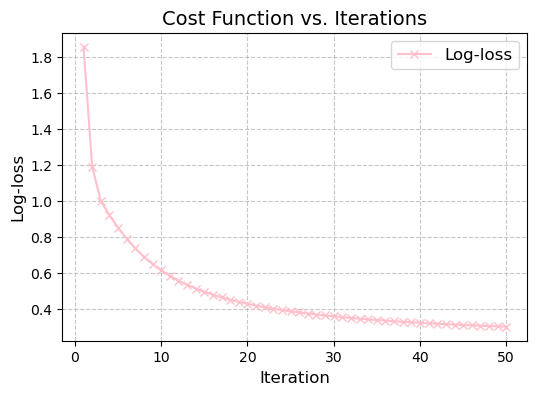

In [17]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

# Custom implementation to track cost over iterations
class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.1, max_iter=50):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.costs = []
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def compute_cost(self, h, y):
        return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    def fit(self, X, y):
        np.random.seed(42)
        self.theta = np.random.randn(X.shape[1] + 1)
        X_bias = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        
        for _ in range(self.max_iter):
            z = np.dot(X_bias, self.theta)
            h = self.sigmoid(z)
            cost = self.compute_cost(h, y)
            self.costs.append(cost)
            
            gradient = np.dot(X_bias.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient

# Train the model with custom implementation
sgd_model = LogisticRegressionSGD(learning_rate=0.1, max_iter=50)
sgd_model.fit(X, y)

# Plot the cost function vs. iterations
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(sgd_model.costs) + 1), sgd_model.costs, marker='x', color='pink', label="Log-loss")
plt.title("Cost Function vs. Iterations", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Log-loss", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()


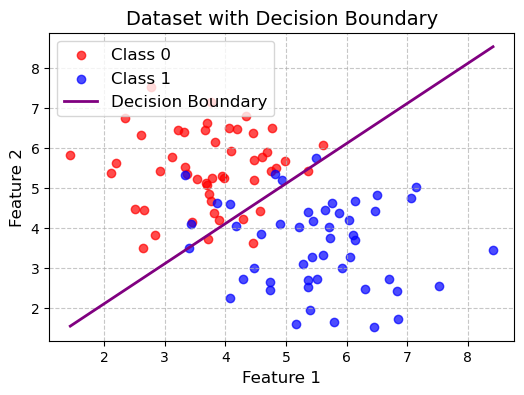

In [19]:
# Define the decision boundary function
def plot_decision_boundary(X, y, coefficients, intercept):
    plt.figure(figsize=(6, 4))
    
    # Scatter plot of the dataset with different colors for classes
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0', alpha=0.7)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1', alpha=0.7)
    
    # Define the decision boundary line
    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(coefficients[0] * x_values + intercept) / coefficients[1]
    
    # Plot the decision boundary
    plt.plot(x_values, y_values, color='purple', label='Decision Boundary', linewidth=2)
    
    # Customize the plot
    plt.title("Dataset with Decision Boundary", fontsize=14)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Plot the dataset and decision boundary
plot_decision_boundary(X, y, coefficients, intercept)


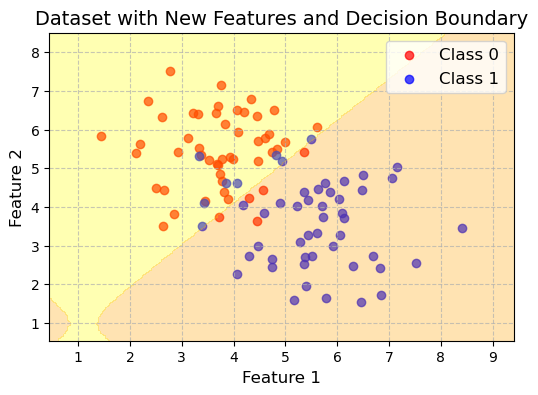

In [21]:
# Add two new independent variables as squares of the original variables
X_new = np.hstack([X, X**2])

# Train logistic regression on the new dataset
model_new = LogisticRegression(max_iter=10000, solver='lbfgs', C=1e10)
model_new.fit(X_new, y)

# Extract new coefficients and intercept
coefficients_new = model_new.coef_[0]
intercept_new = model_new.intercept_[0]

# Define a new decision boundary plotting function for the extended dataset
def plot_decision_boundary_extended(X, y, coefficients, intercept):
    plt.figure(figsize=(6, 4))
    
    # Scatter plot for the data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0', alpha=0.7)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1', alpha=0.7)
    
    # Grid for decision boundary visualization
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid_points = np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2]
    Z = model_new.predict(grid_points).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 0, 1], colors=['yellow', 'orange'], linestyles=['-'])
    
    # Customize plot
    plt.title("Dataset with New Features and Decision Boundary", fontsize=14)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Plot the new dataset and decision boundary
plot_decision_boundary_extended(X, y, coefficients_new, intercept_new)


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predict on the training dataset
y_pred = model.predict(X)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

conf_matrix, accuracy, precision, recall, f1


(array([[45,  5],
        [ 7, 43]], dtype=int64),
 0.88,
 0.8958333333333334,
 0.86,
 0.8775510204081632)